In [2]:
'''
Visualize the data generated from src/cut_and_project/three_dim_commuting.py
'''
import os
import numpy as np
import matplotlib.pyplot as plt
from aperiodic_codes import cut_and_project
data_folder = '../data/three_dim_commuting/'
n = 3

In [26]:
# check commutation in 6D
hx = np.load(os.path.join(data_folder, f'hx_n={n}.npy'))
hz = np.load(os.path.join(data_folder, f'hz_n={n}.npy'))
assert hx.shape[1] == hz.shape[1]
assert np.allclose(hx @ hz.T % 2, np.zeros_like(hx @ hz.T))
assert np.allclose(hz @ hx.T % 2, np.zeros_like(hz @ hx.T))

for i in range(hx.shape[0]):
    assert np.sum(hx[i]) == 6

for i in range(hz.shape[0]):
    assert np.sum(hz[i]) == 6

Number of points: 158


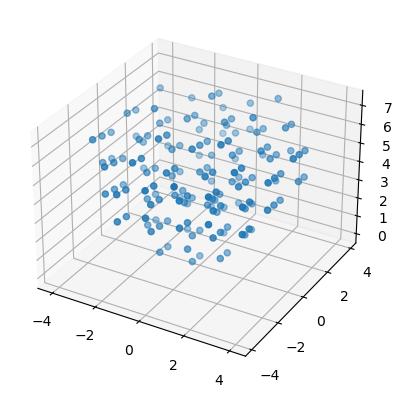

In [2]:
# visualize points in 3D
proj_pts = np.load(os.path.join(data_folder, f'proj_pts_n={n}.npy'))
n_points = proj_pts.shape[1]
print(f'Number of points: {n_points}')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
plt.show()

In [3]:
# check anti-commutation between X and Z checks
new_hx_cc = np.load(os.path.join(data_folder, f'new_hx_cc_n={n}.npy'))
new_hx_vv = np.load(os.path.join(data_folder, f'new_hx_vv_n={n}.npy'))
new_hz_cc = np.load(os.path.join(data_folder, f'new_hz_cc_n={n}.npy'))
new_hz_vv = np.load(os.path.join(data_folder, f'new_hz_vv_n={n}.npy'))

In [4]:
num_nonzero_stabilizers = 0
for i in range(new_hx_cc.shape[0]):
    if np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]) != 0:
        num_nonzero_stabilizers += 1
        # print(f'X check {i}:')
        # print(new_hx_cc[i, :])
        # print(new_hx_vv[i, :])
        # print(np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]))
    print(np.sum(new_hx_cc[i, :] + new_hx_vv[i, :]))

3
3
0
0
0
0
0
6
0
0
0
0
0
0
3
0
0
0
3
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
3
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
3
0
3
0
0
0
0
0
0
0
3
0
0
3
0
0
3
0
6
0
0
0
0
0
0
0
0
0
0
0
0
3
3
0
0
3
0
0
0
3
0
0
0
3
0
0
0
0
0
6
0
0
0
0
0
0
0
3
0
3
3
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [5]:
new_hx = np.hstack([new_hx_cc, new_hx_vv])
new_hz = np.hstack([new_hz_cc, new_hz_vv])

In [6]:
anti_comm_mat_x = (new_hx @ new_hz.T) % 2

In [7]:
print(anti_comm_mat_x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
cnt = 0
for i in range(len(anti_comm_mat_x)):
    if np.sum(anti_comm_mat_x[i]) != 0:
        cnt += 1
        print(f'Row {i}: {np.sum(anti_comm_mat_x[i])}')
print(f'Number of rows with non-zero sum: {cnt}')

Row 7: 1
Row 46: 1
Row 75: 1
Row 94: 1
Row 98: 1
Row 108: 1
Number of rows with non-zero sum: 6


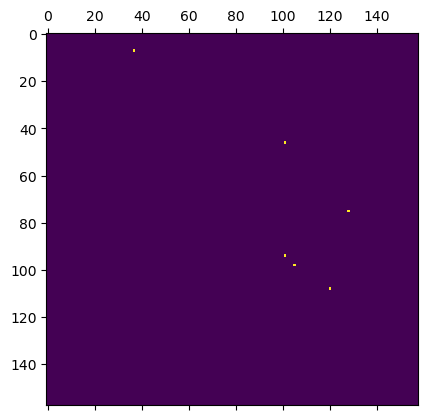

In [9]:
# visualize the anti-commutation matrix
plt.matshow(anti_comm_mat_x)

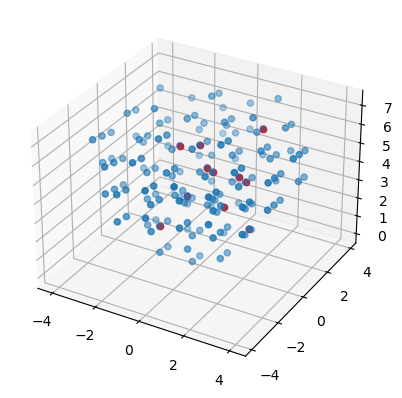

In [10]:
# visualize in 3D
# X part
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_x[i, :]) or np.sum(anti_comm_mat_x[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], proj_pts[2, i], c='r')

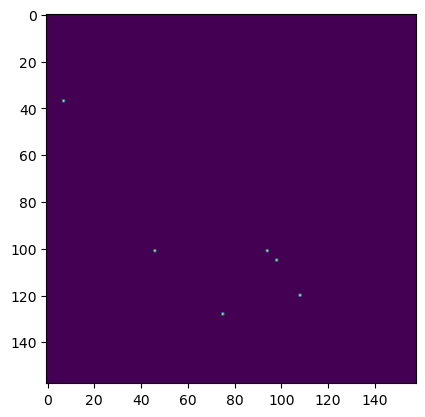

In [11]:
# Z part
anti_comm_mat_z = (new_hz @ new_hx.T) % 2
np.save(os.path.join(data_folder, f'anti_comm_mat_z_n={n}.txt'), anti_comm_mat_z)
plt.imshow(anti_comm_mat_z)

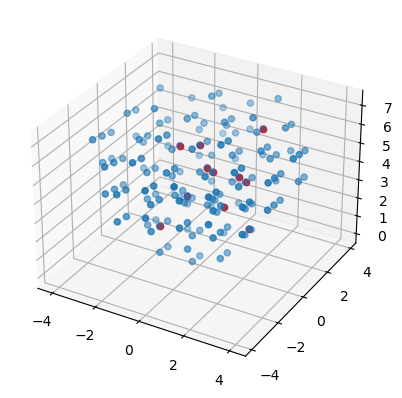

In [12]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_pts[0, :], proj_pts[1, :], proj_pts[2, :])
for i in range(proj_pts.shape[1]):
    if np.sum(anti_comm_mat_z[i, :]) or np.sum(anti_comm_mat_z[:, i]):
        ax.scatter(proj_pts[0, i], proj_pts[1, i], proj_pts[2, i], c='r')
plt.show()